In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

income_df=pd.read_csv("C:/KM/Datasets/Income Dataset/income_evaluation.csv")
income_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
income_df[' workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

<Axes: xlabel=' hours-per-week', ylabel='Count'>

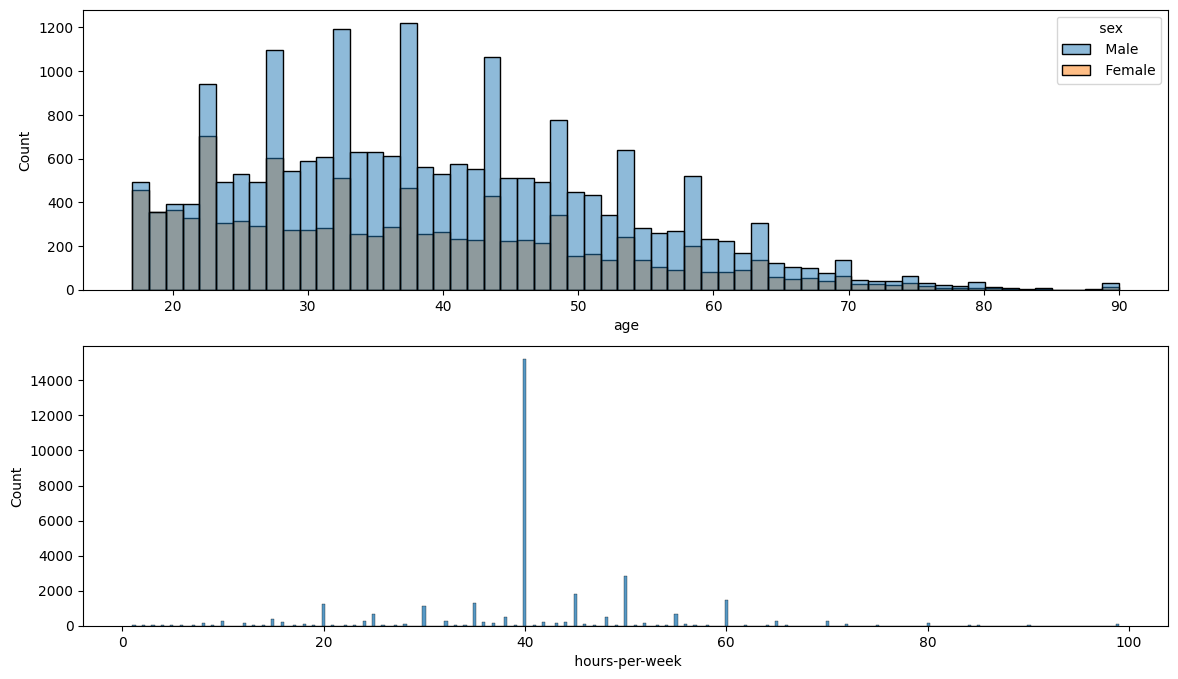

In [21]:
fig,ax=plt.subplots(2,1,figsize=(14,8))
sns.histplot(x='age',data=income_df,ax=ax[0],hue=' sex')
sns.histplot(x=' hours-per-week',data=income_df,ax=ax[1])

<Axes: xlabel=' workclass', ylabel='Count'>

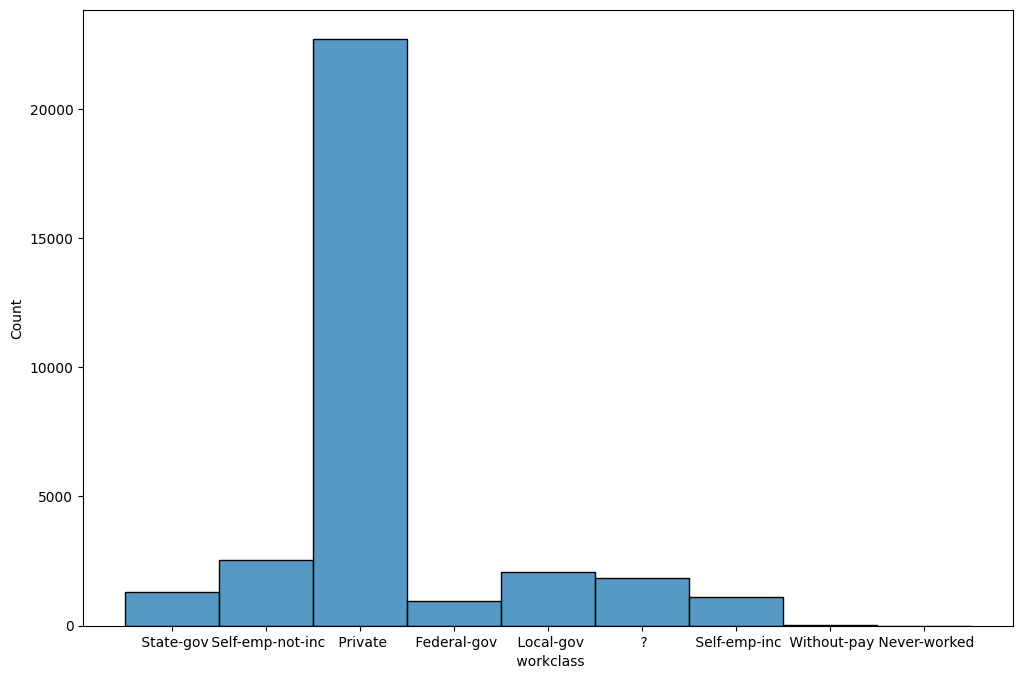

In [22]:
fig,ax=plt.subplots(figsize=(12,8))
sns.histplot(x=' workclass',data=income_df)

In [24]:
input_cols=['age', ' workclass',' education-num', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']
target_col=' income'


In [25]:
from sklearn.model_selection import train_test_split
train_set,val_set=train_test_split(income_df,test_size=0.2,random_state=42)

In [26]:
train_inputs=train_set[input_cols].copy()
train_target=train_set[target_col].copy()
val_inputs=val_set[input_cols].copy()
val_target=val_set[target_col].copy()

In [27]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
cat_cols=train_inputs.select_dtypes(include='object').columns.tolist()
numeric_cols,cat_cols

(['age',
  ' education-num',
  ' capital-gain',
  ' capital-loss',
  ' hours-per-week'],
 [' workclass',
  ' occupation',
  ' relationship',
  ' race',
  ' sex',
  ' native-country'])

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
enc.fit(train_inputs[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [29]:
encoded_cols=enc.get_feature_names_out(cat_cols).tolist()
train_inputs[encoded_cols]=enc.transform(train_inputs[cat_cols])
val_inputs[encoded_cols]=enc.transform(val_inputs[cat_cols])

In [31]:
x_train=train_inputs[numeric_cols+encoded_cols]
x_val=val_inputs[numeric_cols+encoded_cols]

In [39]:
from sklearn.metrics import accuracy_score,f1_score
def model_evaluate(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_val)
    print(f'Training: Acc Score:{accuracy_score(train_preds,train_target)} and f1 score:{f1_score(train_preds,train_target,pos_label=" >50K")}')
    print(f'Validation: Acc Score:{accuracy_score(val_preds,val_target)} and f1 score:{f1_score(val_preds,val_target,pos_label=" >50K")}')

In [42]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression(class_weight='balanced')
model_log.fit(x_train,train_target)

c:\Users\KARAN MATTOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [43]:
model_evaluate(model_log)

Training: Acc Score:0.745661855036855 and f1 score:0.617472140423812
Validation: Acc Score:0.7620144326731153 and f1 score:0.6352941176470588


In [60]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(max_depth=11,random_state=42,class_weight='balanced')
model_tree.fit(x_train,train_target)

DecisionTreeClassifier(class_weight='balanced', max_depth=11, random_state=42)

In [61]:
model_evaluate(model_tree)

Training: Acc Score:0.8338835995085995 and f1 score:0.7233906539666305
Validation: Acc Score:0.8129894058037771 and f1 score:0.6875320677270395


In [88]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(n_jobs=-1,n_estimators=80,max_depth=16,random_state=42,class_weight='balanced')
model_forest.fit(x_train,train_target)

RandomForestClassifier(class_weight='balanced', max_depth=16, n_estimators=80,
                       n_jobs=-1, random_state=42)

In [89]:
model_evaluate(model_forest)

Training: Acc Score:0.8560350122850123 and f1 score:0.7537754432042022
Validation: Acc Score:0.8284968524489482 and f1 score:0.7015762757146674
